In [1]:
print()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('predictive_maintenance.csv')
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

data['Product ID']=l.fit_transform(data['Product ID'])
data['Type']=l.fit_transform(data['Type'])
data['Failure Type']=l.fit_transform(data['Failure Type'])
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003,2,298.1,308.6,1551,42.8,0,0,1
1,2,1003,1,298.2,308.7,1408,46.3,3,0,1
2,3,1004,1,298.1,308.5,1498,49.4,5,0,1
3,4,1005,1,298.2,308.6,1433,39.5,7,0,1
4,5,1006,1,298.2,308.7,1408,40.0,9,0,1


In [6]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

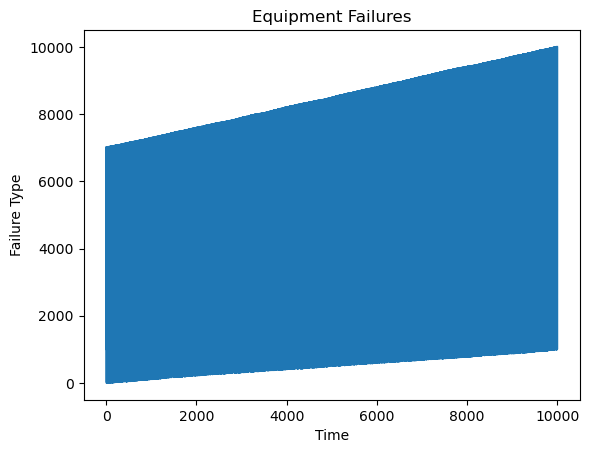

In [7]:
df=data.iloc[:,1].values
plt.plot(df)
plt.xlabel('Time')
plt.ylabel('Failure Type')
plt.title('Equipment Failures')
plt.show()

In [8]:
df.shape

(10000,)

In [9]:
df=df.reshape(-1,1)
df=df.astype('float32')
df.shape

(10000, 1)

In [10]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)

In [11]:
train_size=int(len(df)*0.8)
test_size=len(df)-train_size
print('Train Size:\t',train_size)
print()
print('Test Size:\t',test_size)

Train Size:	 8000

Test Size:	 2000


In [12]:
train=df[0:train_size,:]
test=df[train_size:len(df),:]
print('Train Size:\t',len(train))
print()
print('Test Size:\t',len(test))


Train Size:	 8000

Test Size:	 2000


In [13]:
datax=[]
datay=[]
timestamp=10
for i in range(len(train)-timestamp-1):
    a=train[i:(i+timestamp),0]
    datax.append(a)
    datay.append(train[i+timestamp,0])

trainx,trainy=np.array(datax),np.array(datay)
print(trainx.shape,trainy.shape)


(7989, 10) (7989,)


In [14]:
datax=[]
datay=[]
timestamp=10
for i in range(len(test)-timestamp-1):
    a=test[i:(i+timestamp),0]
    datax.append(a)
    datay.append(test[i+timestamp,0])

testx,testy=np.array(datax),np.array(datay)
print(testx.shape,testy.shape)

(1989, 10) (1989,)


In [15]:
#reshape
trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

#define the model
model=Sequential()
model.add(LSTM(50,input_shape=(1,timestamp),activation='relu'))
model.add(Dense(1))
#model compile
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
#run the model
model.fit(trainx,trainy,epochs=50,batch_size=1,verbose=2)


Epoch 1/50
7989/7989 - 9s - loss: 0.0725 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 2/50
7989/7989 - 9s - loss: 0.0711 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 3/50
7989/7989 - 10s - loss: 0.0706 - accuracy: 1.2517e-04 - 10s/epoch - 1ms/step
Epoch 4/50
7989/7989 - 9s - loss: 0.0703 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 5/50
7989/7989 - 9s - loss: 0.0699 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 6/50
7989/7989 - 9s - loss: 0.0699 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 7/50
7989/7989 - 9s - loss: 0.0697 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 8/50
7989/7989 - 9s - loss: 0.0695 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 9/50
7989/7989 - 9s - loss: 0.0694 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 10/50
7989/7989 - 9s - loss: 0.0690 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 11/50
7989/7989 - 9s - loss: 0.0691 - accuracy: 1.2517e-04 - 9s/epoch - 1ms/step
Epoch 12/50
7989/7989 - 9s - loss: 0.0691 - accura

In [18]:

#make predictions
trainPredict=model.predict(trainx)
testPredict=model.predict(testx)
trainPredict[:5]

63/63 [==============================] - 0s 887us/step


array([[0.28351736],
       [0.26886564],
       [0.24922475],
       [0.2262226 ],
       [0.2500161 ]], dtype=float32)

In [19]:
#Inverse the scalled form of data
trainPredict=scaler.inverse_transform(trainPredict)
trainPredict[:5]

array([[2834.8901],
       [2688.3875],
       [2491.9983],
       [2261.9998],
       [2499.911 ]], dtype=float32)

In [20]:
trainy=scaler.inverse_transform([trainy])
testPredict=scaler.inverse_transform(testPredict)
testy=scaler.inverse_transform([testy])


In [21]:
import math
trainScore=np.sqrt(mean_squared_error(trainy[0],trainPredict[:,0]))
print('Train Score-RMSE:\t',trainScore)
testScore=math.sqrt(mean_squared_error(testy[0],testPredict[:,0]))
print('Test Score-RMSE:\t',testScore)


Train Score-RMSE:	 2555.193111654493
Test Score-RMSE:	 2781.375521238244


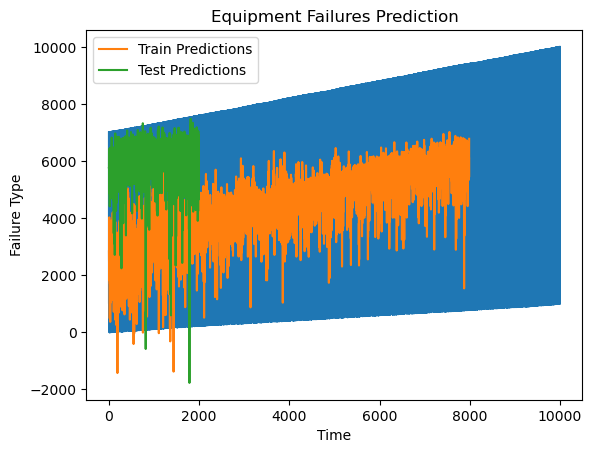

In [26]:
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredict, label='Train Predictions')
plt.plot(testPredict, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Failure Type')
plt.title('Equipment Failures Prediction')
plt.legend()
plt.show()

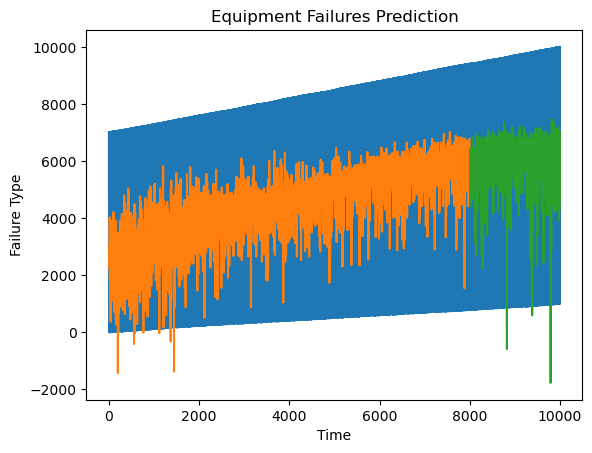

In [33]:
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[timestamp:len(trainPredict)+timestamp,:]=trainPredict
testPredictPlot=np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(timestamp*2)+1:len(df)-1,:]=testPredict


#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot, label='Train Predictions')
plt.plot(testPredictPlot, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Failure Type')
plt.title('Equipment Failures Prediction')
plt.show()